Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [1]:
from random import choices, choice, randint, random
import math
from matplotlib import pyplot as plt
import lab9_lib

In [2]:
fitness = lab9_lib.make_problem(10)
for n in range(10):
    ind = choices([0, 1], k=50)
    print(f"{''.join(str(g) for g in ind)}: {fitness(ind):.2%}")

print(fitness.calls)

01011100101101110111111111100010000100101111110101: 9.11%
10001100100101000110100110010110000001010010111010: 23.56%
01001001011110010100010111101000111010011111010101: 7.33%
11110111110010000011110010111110101110110101100111: 19.33%
00011101100111000110011001101110001111111111110011: 9.13%
00111111011111000110011010111110100010001110101100: 9.11%
11111101101101100001111101100110101011000111110101: 39.33%
01110111010011101101011111100010010110010101101110: 19.33%
01011001110010010111011111101111101110110000011101: 9.11%
00001100111110001010100001110010100010100100110010: 7.33%
10


## First Choice Hill Climber

In [3]:
def tweak(state):
    new_state = state.copy()
    index = randint(0, len(state)-1)
    new_state[index] = 1 - new_state[index]
    return new_state

In [4]:
def hill_climber(fitness, tweak = tweak, start = choices([0, 1], k=1000)):    
    fit = {}
    results = []

    current_state = start

    def fitness_wrapper(state):
        key = str(state)
        if key not in fit.keys():
            fit[key] = fitness(state)
        return fit[key]

    for _ in range(10_000):
        new_state = tweak(current_state)
        if fitness_wrapper(new_state) >= fitness_wrapper(current_state):
            current_state = new_state
        results.append(fitness_wrapper(current_state))
    print("Solution:", current_state)
    return fitness.calls, results

In [5]:
def plot_hc(*args):
    plt.title("First Choice Hill Climbing")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    for arg in args:
        results = arg[0][1]
        fc = str(arg[0][0])
        plt.plot(range(len(results)), results, label = "Instance "+str(arg[1]) +" ("+fc+" FC)")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

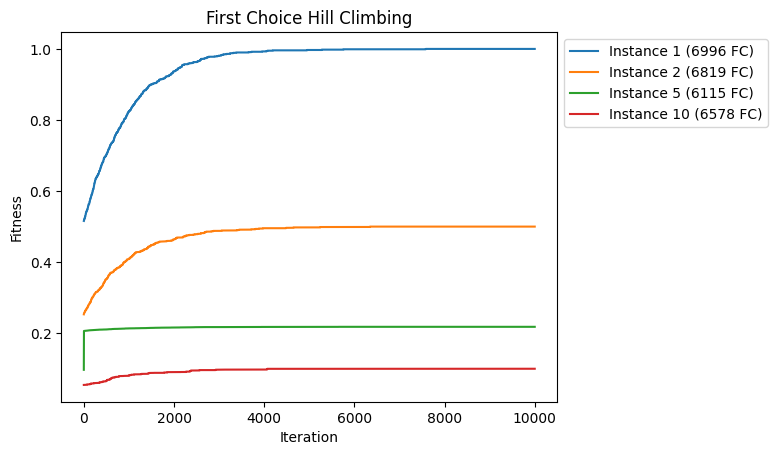

In [6]:
plot_hc((hill_climber(lab9_lib.make_problem(1)), 1), (hill_climber(lab9_lib.make_problem(2)), 2), (hill_climber(lab9_lib.make_problem(5)), 5), (hill_climber(lab9_lib.make_problem(10)), 10))

# Simulated Annealing

In [7]:
def simulated_annealing(fitness, tweak = tweak, start = choices([0, 1], k=1000)):
    fit = {}
    results = []

    current_state = start


    def fitness_wrapper(state):
        key = str(state)
        if key not in fit.keys():
            fit[key] = fitness(state)
        return fit[key]\
        

    for t in range(1000, 0, -1):
        temperature = t/1000
        new_state = tweak(current_state)
        diff =  fitness_wrapper(new_state) - fitness_wrapper(current_state)
        if diff > 0 or random() < math.exp(diff/temperature):
            current_state = new_state
        results.append(fitness_wrapper(current_state))
    print("Solution:", current_state)
    return fitness.calls, results

In [8]:
def plot_sa(*args):
    plt.title("Simulated Annealing")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    for arg in args:
        results = arg[0][1]
        fc = str(arg[0][0])
        plt.plot(range(len(results)), results, label = "Instance "+str(arg[1]) +" ("+fc+" FC)")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

Solution: [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,

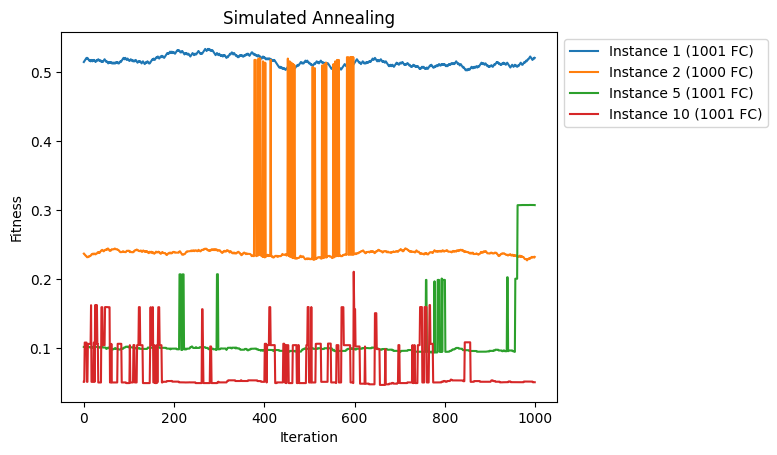

In [9]:
plot_sa((simulated_annealing(lab9_lib.make_problem(1)), 1), (simulated_annealing(lab9_lib.make_problem(2)), 2), (simulated_annealing(lab9_lib.make_problem(5)), 5), (simulated_annealing(lab9_lib.make_problem(10)), 10))

## Changing the tweak function

In [10]:
zeros = [0 for _ in range(1000)]
ones = [1 for _ in range(1000)]
for instance in [1, 2, 5, 10]:
    fitness = lab9_lib.make_problem(instance)
    print("Instance ", instance, "\nAll zeros: ", fitness(zeros), "\nAll ones: ", fitness(ones))

Instance  1 
All zeros:  0.0 
All ones:  1.0
Instance  2 
All zeros:  0.0 
All ones:  1.0
Instance  5 
All zeros:  0.0 
All ones:  1.0
Instance  10 
All zeros:  0.0 
All ones:  1.0


In [11]:
def tweak_2(state):  # select a random locus with a gene == 0 and set it to 1
    new_state = state.copy()
    allowed_indices = [i for i in range(len(new_state)) if new_state[i] == 0]
    if allowed_indices:
        index = choice(allowed_indices)
        new_state[index] = 1
    return new_state

Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

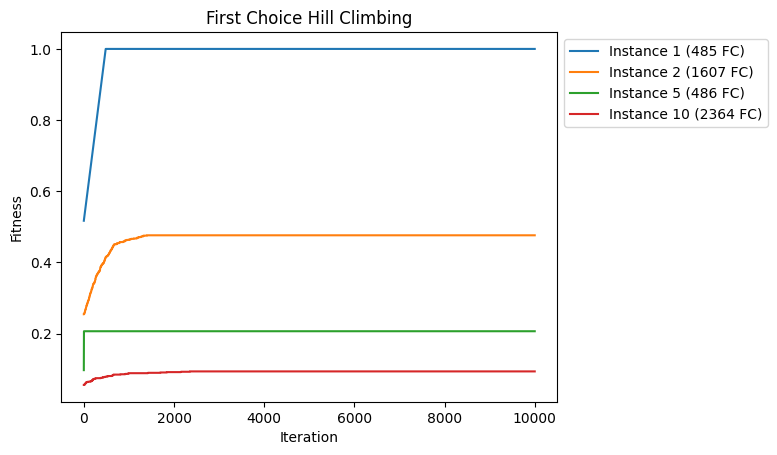

In [12]:
plot_hc((hill_climber(lab9_lib.make_problem(1), tweak=tweak_2), 1), (hill_climber(lab9_lib.make_problem(2), tweak=tweak_2), 2), (hill_climber(lab9_lib.make_problem(5), tweak=tweak_2), 5), (hill_climber(lab9_lib.make_problem(10), tweak=tweak_2), 10))

Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

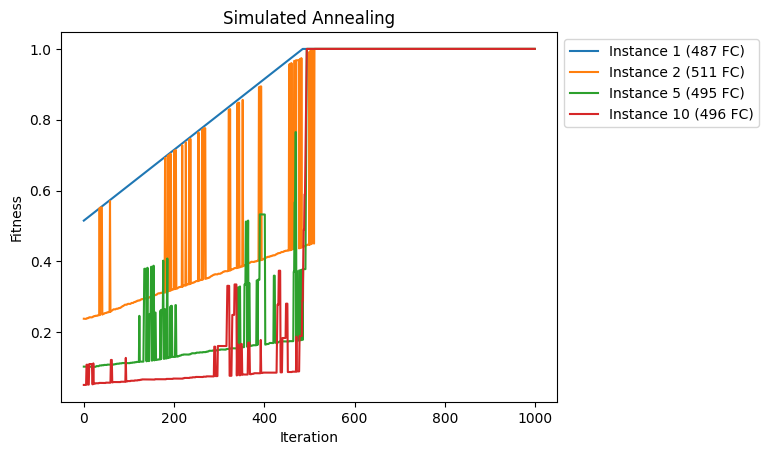

In [13]:
plot_sa((simulated_annealing(lab9_lib.make_problem(1), tweak=tweak_2), 1), (simulated_annealing(lab9_lib.make_problem(2), tweak=tweak_2), 2), (simulated_annealing(lab9_lib.make_problem(5), tweak=tweak_2), 5), (simulated_annealing(lab9_lib.make_problem(10), tweak=tweak_2), 10))

# Evolutionary Algorithms

## ($\mu$, $\lambda$)-ES

In [14]:
def comma_es(eval, tweak=tweak):
    LAMBDA = 30 # offpsring size
    MU = 10 # population size
    MUTATION_CHANCE = 0.05
    TOUR_SIZE = 2
    NUM_PARENTS = 2
    GENERATIONS = 2_000

    def mutate(state):
        return tweak(state)


    def xover(states):
        child = list()
        for i in range(1000):
            child.append(choice([state[i] for state in states]))
        return child         
    

    fitness = {}
    results = []

    def evaluate(state):
        key = str(state)
        if key not in fitness.keys():
            fitness[key] = eval(state)
        return fitness[key] 

    population = [choices([0, 1], k=1000) for _ in range(MU)]

    def select_parent():
        candidates = [choice(population) for _ in range(TOUR_SIZE)]
        champion = max(candidates, key=evaluate)
        return champion

    for _ in range(GENERATIONS):
        offspring = list()
        for _ in range(LAMBDA):
            if random() < MUTATION_CHANCE: # mutate
                parent = select_parent()
                child = mutate(parent)
            else:
                parents = list()
                for _ in range(NUM_PARENTS):
                    parents.append(select_parent())
                child = xover(parents)
            offspring.append(child)
        offspring.sort(key = evaluate, reverse=True)
        population = offspring[: MU]
        results.append(evaluate(population[0]))
    print("Solution:", population[0])
    return eval.calls, results

In [15]:
def plot_comma(*args):
    plt.title("Comma Strategy")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    for arg in args:
        results = arg[0][1]
        fc = str(arg[0][0])
        plt.plot(range(len(results)), results, label = "Instance "+str(arg[1]) +" ("+fc+" FC)")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

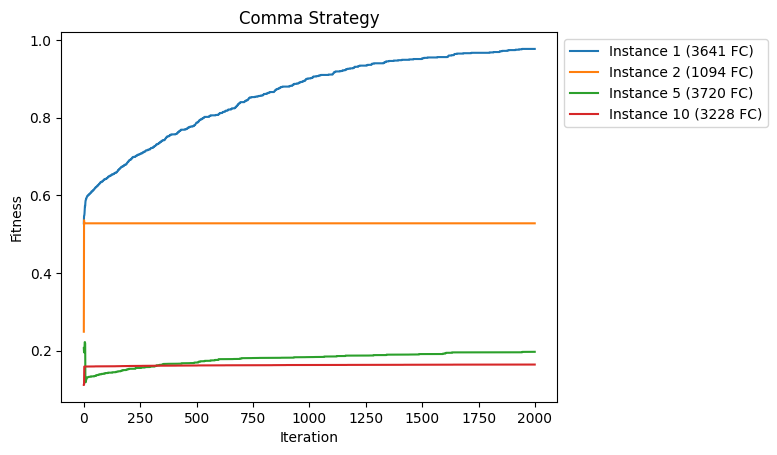

In [16]:
plot_comma((comma_es(lab9_lib.make_problem(1)), 1), (comma_es(lab9_lib.make_problem(2)), 2), (comma_es(lab9_lib.make_problem(5)), 5), (comma_es(lab9_lib.make_problem(10)), 10))

Solution: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

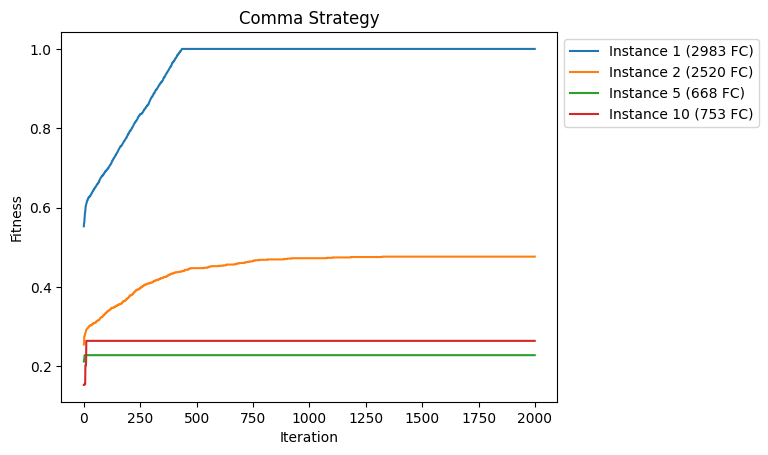

In [17]:
plot_comma((comma_es(lab9_lib.make_problem(1), tweak=tweak_2), 1), (comma_es(lab9_lib.make_problem(2), tweak=tweak_2), 2), (comma_es(lab9_lib.make_problem(5), tweak=tweak_2), 5), (comma_es(lab9_lib.make_problem(10), tweak=tweak_2), 10))